In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline
from functools import reduce # Inner join mais de 1 base de dados
import matplotlib.dates as mdates # Arrumar as datas no eixo
from matplotlib import dates

In [34]:
patos = pd.read_excel('patos_prefeitura.xlsx')
patos.tail(20)

,data,confirmados,obitos,recuperados,novos_casos,novos_obitos,novos_recuperados,isolamento_domiciliar,internado,novos_isolamento,novos_internados
36,2020-06-11,1003,34,340,29,3,8,617,12,18,0
37,2020-06-12,1028,43,349,25,9,9,629,7,12,-5
38,2020-06-13,1028,43,349,0,0,0,629,7,0,0
39,2020-06-14,1028,43,349,0,0,0,629,7,0,0
40,2020-06-15,1089,45,360,61,2,11,678,6,49,-1
41,2020-06-16,1134,45,373,45,0,13,708,8,30,2
42,2020-06-17,1134,45,373,0,0,0,708,8,0,0
43,2020-06-18,1245,46,407,111,1,34,785,7,77,-1
44,2020-06-19,1303,47,415,58,1,8,833,8,48,1
45,2020-06-20,1303,47,415,0,0,0,833,8,0,0


In [35]:
patos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
data                     56 non-null datetime64[ns]
confirmados              56 non-null int64
obitos                   56 non-null int64
recuperados              56 non-null int64
novos_casos              56 non-null int64
novos_obitos             56 non-null int64
novos_recuperados        56 non-null int64
isolamento_domiciliar    56 non-null int64
internado                56 non-null int64
novos_isolamento         56 non-null int64
novos_internados         56 non-null int64
dtypes: datetime64[ns](1), int64(10)
memory usage: 4.9 KB


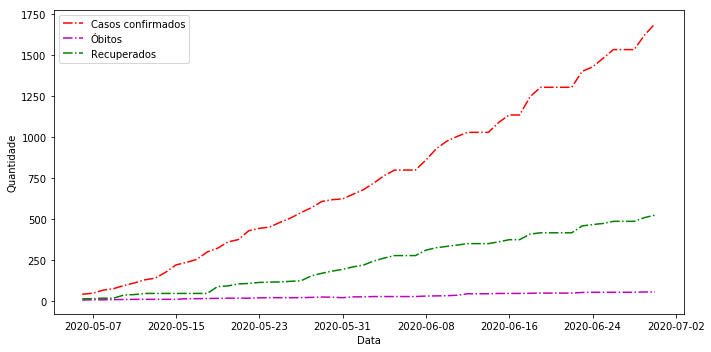

In [37]:
# Mapa confirmados e novos casos
fig, ax = plt.subplots()
ax.plot(patos['data'], patos['confirmados'], 'r-.', label = 'Casos confirmados')
ax.plot(patos['data'],patos['obitos'], 'm-.', label = 'Óbitos') 
ax.plot(patos['data'],patos['recuperados'], 'g-.', label = 'Recuperados') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.rcParams['figure.figsize'] = (10,5)
plt.tight_layout() # Organiza o espaço
ax.legend(loc = 'upper left')
plt.savefig('Prefeitura\PREFEITURA_conf_obi_recu.png')

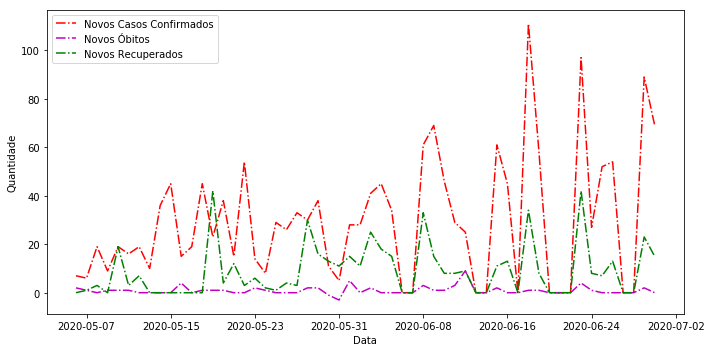

In [38]:
# Mapa confirmados e novos casospatos
fig, ax = plt.subplots()
ax.plot(patos['data'], patos['novos_casos'], 'r-.', label = 'Novos Casos Confirmados')
ax.plot(patos['data'],patos['novos_obitos'], 'm-.', label = 'Novos Óbitos') 
ax.plot(patos['data'],patos['novos_recuperados'], 'g-.', label = 'Novos Recuperados') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('Prefeitura\PREFEITURA_novos_patos.png')

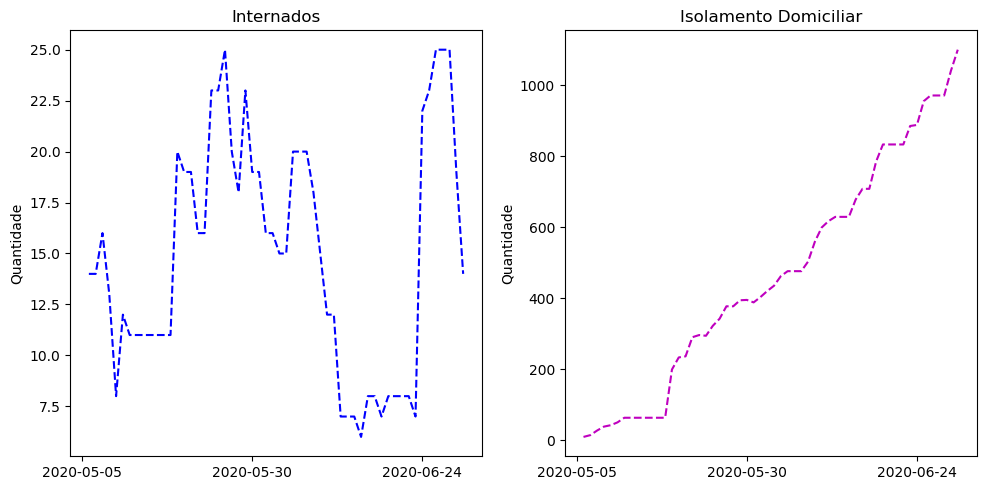

In [39]:

fig, ax = plt.subplots(figsize=(10,5), dpi = 100, nrows=1, ncols=2)

#Internados
ax[0].set_title('Internados')
ax[0].plot(patos['data'], (patos['internado']), 'b--')
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(3)) # Define quantidad de label
ax[0].set_ylabel('Quantidade')

#Internados
ax[1].set_title('Isolamento Domiciliar')
ax[1].plot(patos['data'], (patos['isolamento_domiciliar']), 'm--')
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(3)) # Define quantidad de label
ax[1].set_ylabel('Quantidade')


plt.tight_layout() # Organiza o espaço

fig.savefig('Prefeitura\PREFEITURA_internados_isoldomici.png')

In [40]:
patos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
data                     56 non-null datetime64[ns]
confirmados              56 non-null int64
obitos                   56 non-null int64
recuperados              56 non-null int64
novos_casos              56 non-null int64
novos_obitos             56 non-null int64
novos_recuperados        56 non-null int64
isolamento_domiciliar    56 non-null int64
internado                56 non-null int64
novos_isolamento         56 non-null int64
novos_internados         56 non-null int64
dtypes: datetime64[ns](1), int64(10)
memory usage: 4.9 KB


# Análise casos ativos

In [41]:
ativos = patos['confirmados'] - patos['recuperados'] - patos['obitos']
patos['ativos'] = ativos

In [42]:
patos.head()

,data,confirmados,obitos,recuperados,novos_casos,novos_obitos,novos_recuperados,isolamento_domiciliar,internado,novos_isolamento,novos_internados,ativos
0,2020-05-06,40,5,12,7,2,0,9,14,0,0,23
1,2020-05-07,46,6,13,6,1,1,14,14,5,0,27
2,2020-05-08,65,6,16,19,0,3,27,16,13,2,43
3,2020-05-09,74,7,16,9,1,0,38,13,11,-3,51
4,2020-05-10,93,8,35,19,1,19,42,8,4,-5,50


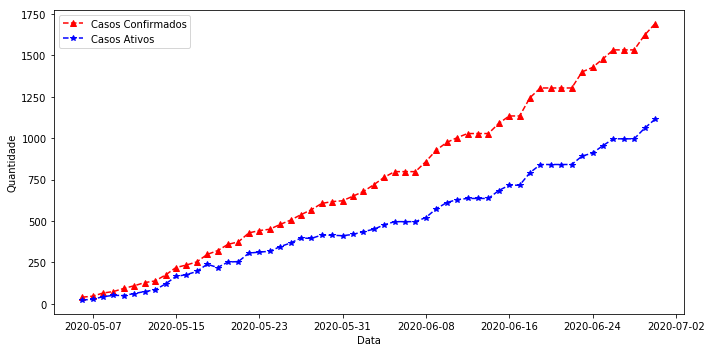

In [43]:
# Mapa confirmados e novos casospatos
fig, ax = plt.subplots()
ax.plot(patos['data'], patos['confirmados'], 'r--^', label = 'Casos Confirmados')
ax.plot(patos['data'], patos['ativos'], 'b--*', label = 'Casos Ativos')
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('Prefeitura\PREFEITURA_patos_ativos.png')

# Análise da Zona metropolitana

In [44]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')
df_teste = df_teste[['data','cidade','confirmados']]
patos = patos[['data','confirmados']]
patos['data'] = patos['data'].dt.strftime('%Y-%m-%d')
pb = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]

# Campina Grande

In [45]:
cg = df_teste.loc[(df_teste['cidade'] == 'Campina Grande')]
puxinana = df_teste.loc[((df_teste['cidade'] == 'Puxinanã') )]
lagoa_seca = df_teste.loc[(df_teste['cidade'] == 'Lagoa Seca')]
massaranduba = df_teste.loc[(df_teste['cidade'] == 'Massaranduba')]
serra_redonda = df_teste.loc[(df_teste['cidade'] == 'Serra Redonda')]
itatuba = df_teste.loc[(df_teste['cidade'] == 'Itatuba')]
queimadas = df_teste.loc[(df_teste['cidade'] == 'Queimadas')]
boqueirao = df_teste.loc[(df_teste['cidade'] == 'Boqueirão')]
barra_santana = df_teste.loc[(df_teste['cidade'] == 'Barra de Santana')]
gado_bravo = df_teste.loc[(df_teste['cidade'] == 'Gado Bravo')]
aroeiras = df_teste.loc[(df_teste['cidade'] == 'Aroeiras')]
umbuzeiro = df_teste.loc[(df_teste['cidade'] == 'Umbuzeiro')]

In [46]:
dfs = [cg, puxinana, lagoa_seca, massaranduba,serra_redonda,itatuba,queimadas, boqueirao,barra_santana,gado_bravo,aroeiras, umbuzeiro, pb]

zm_cg = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_cg.columns = ['data','cidade','c_cg','cidade','c_pux','cidade','c_ls','cidade','c_massa', 'cidade','c_sr',
                 'cidade','c_ita','cidade','c_quei', 'cidade','c_boq','cidade','c_bs','cidade','c_gb','cidade','c_a', 'cidade','c_umbu', 'cidade','c_pb']

del zm_cg['cidade']

zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063


In [47]:
zm_cg["total_zona"] = zm_cg.sum(axis=1) - zm_cg['c_pb']
zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777,169
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045,194
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361,205
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739,317
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063,345


In [48]:
zm_cg['participacao'] = zm_cg['total_zona']*100/zm_cg['c_pb']
zm_cg.tail()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona,participacao
45,2020-06-26,6261,161,347,123,125,116,440,108,47,60,76,30,42832,7894,18.430146
46,2020-06-27,6389,168,348,139,125,121,445,114,49,60,76,30,44242,8064,18.227024
47,2020-06-28,6440,169,349,140,129,121,465,114,49,61,76,30,44679,8143,18.225565
48,2020-06-29,6505,170,349,141,131,121,465,114,49,61,76,30,45057,8212,18.225803
49,2020-06-30,6625,172,354,141,131,122,483,119,55,61,83,30,46957,8376,17.837596


# Patos

In [49]:
patos.tail()

,data,confirmados
51,2020-06-26,1533
52,2020-06-27,1533
53,2020-06-28,1533
54,2020-06-29,1622
55,2020-06-30,1691


In [50]:
df_teste.tail()

,data,cidade,confirmados
11164,2020-06-30,Algodão de Jandaíra,3
11165,2020-06-30,Santana de Mangueira,1
11166,2020-06-30,Poço Dantas,2
11167,2020-06-30,São Domingos,1
11168,2020-06-30,Paraíba,46957


In [51]:
santa_teresinha = df_teste.loc[(df_teste['cidade'] == 'Santa Teresinha')]
condado = df_teste.loc[(df_teste['cidade'] == 'Condado')]
malta = df_teste.loc[(df_teste['cidade'] == 'Malta')]
santa_luzia = df_teste.loc[(df_teste['cidade'] == 'Santa Luzia')]
sjs = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
js = df_teste.loc[(df_teste['cidade'] == 'Junco do Seridó')]
teixeira = df_teste.loc[(df_teste['cidade'] == 'Teixeira')]
mat = df_teste.loc[(df_teste['cidade'] == 'Maturéia')]

In [52]:
dfs = [patos, santa_teresinha, condado, malta, santa_luzia, sjs, js, teixeira, mat, pb]

zm_pt = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_pt.columns = ['data','c_pt','cidade','c_st','cidade','c_cond','cidade','c_malta', 'cidade','c_sl',
                 'cidade','c_sjs','cidade','c_js', 'cidade','c_tex','cidade','c_mat', 'cidade','c_pb']

del zm_pt['cidade']

zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb
46,2020-06-26,1533,28,67,18,158,140,22,58,21,42832
47,2020-06-27,1533,28,69,19,159,140,23,58,22,44242
48,2020-06-28,1533,28,69,19,160,140,23,58,22,44679
49,2020-06-29,1622,28,69,19,160,143,23,58,22,45057
50,2020-06-30,1691,29,71,20,163,159,25,59,23,46957


In [53]:
zm_pt["total_zona"] = zm_pt.sum(axis=1) - zm_pt['c_pb']
zm_pt.head()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona
0,2020-05-11,109,1,11,1,1,2,3,1,1,2525,130
1,2020-05-12,128,1,14,1,1,2,3,1,1,2777,152
2,2020-05-13,138,1,14,2,4,2,3,1,1,3045,166
3,2020-05-14,174,1,14,2,4,2,3,1,1,3361,202
4,2020-05-15,219,1,20,4,4,2,3,1,1,3739,255


In [54]:
zm_pt['participacao'] = zm_pt['total_zona']*100/zm_pt['c_pb']
zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona,participacao
46,2020-06-26,1533,28,67,18,158,140,22,58,21,42832,2045,4.774468
47,2020-06-27,1533,28,69,19,159,140,23,58,22,44242,2051,4.635866
48,2020-06-28,1533,28,69,19,160,140,23,58,22,44679,2052,4.592762
49,2020-06-29,1622,28,69,19,160,143,23,58,22,45057,2144,4.758417
50,2020-06-30,1691,29,71,20,163,159,25,59,23,46957,2240,4.770322


# Juntando Bases

In [55]:
zm_cg = zm_cg[['data','participacao']]
zm_pt = zm_pt[['data','participacao']]

In [56]:
dfs = [zm_cg,zm_pt]

zonas = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zonas.columns = ['data','part_cg','part_pt']

zonas.tail(10)

,data,part_cg,part_pt
40,2020-06-21,18.807090,4.784689
41,2020-06-22,18.594476,4.735189
42,2020-06-23,17.892766,4.807816
43,2020-06-24,18.345360,4.830627
44,2020-06-25,18.513619,4.854987
45,2020-06-26,18.430146,4.774468
46,2020-06-27,18.227024,4.635866
47,2020-06-28,18.225565,4.592762
48,2020-06-29,18.225803,4.758417
49,2020-06-30,17.837596,4.770322


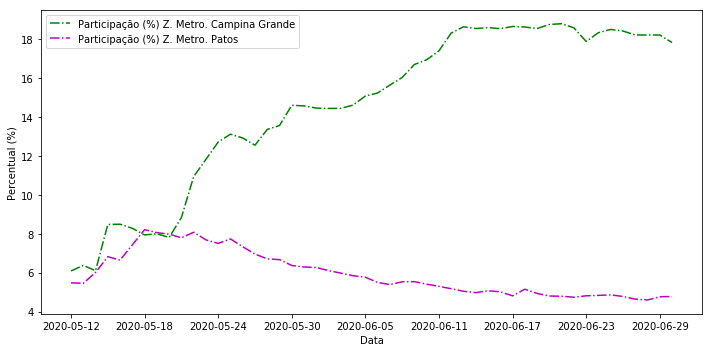

In [57]:
# Mapa confirmados e novos casos
fig, ax = plt.subplots()
ax.plot(zonas['data'], zonas['part_cg'], 'g-.', label = 'Participação (%) Z. Metro. Campina Grande')
ax.plot(zonas['data'], zonas['part_pt'], 'm-.', label = 'Participação (%) Z. Metro. Patos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('Prefeitura\PREFEITURA_cg_pt.png')

# Participação zm patos

In [59]:
# Confirmados
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')
df_muni = df_teste[['data','cidade', 'confirmados']]
df_muni = df_muni.loc[(df_muni['data'] == '2020-05-16') | (df_muni['data'] == '2020-05-25')]
df_muni = df_muni.loc[(df_muni['cidade'] == 'Patos') |
                      (df_muni['cidade'] == 'Santa Teresinha') |
                      (df_muni['cidade'] == 'Condado') |
                      (df_muni['cidade'] == 'Santa Luzia') |
                      (df_muni['cidade'] == 'Junco do Seridó') |
                      (df_muni['cidade'] == 'Teixeira') |
                      (df_muni['cidade'] == 'São José do Sabugi') |
                      (df_muni['cidade'] == 'Maturéia')]



In [60]:
df_muni.loc[(df_muni['cidade'] == 'Patos') & (df_muni['data'] == '2020-05-25'), 'confirmados'] = 479

In [61]:
df_muni.tail(10)

,data,cidade,confirmados
2138,2020-05-16,Santa Teresinha,1
2142,2020-05-16,Maturéia,1
3454,2020-05-25,Patos,479
3457,2020-05-25,Junco do Seridó,5
3524,2020-05-25,Condado,31
3527,2020-05-25,Santa Luzia,26
3539,2020-05-25,Teixeira,13
3549,2020-05-25,São José do Sabugi,46
3553,2020-05-25,Santa Teresinha,6
3557,2020-05-25,Maturéia,7


In [62]:
df_muni = df_muni.loc[(df_muni['data'] == '2020-05-25')]
sum(df_muni['confirmados'])

613

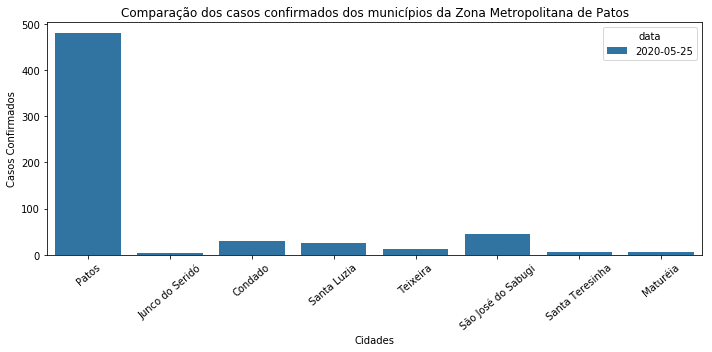

In [63]:
import seaborn as sns

# A linha no meio mostra o desvio padrão, enquanto a barra mostra a média
fig = sns.barplot(x = 'cidade', y = 'confirmados', hue = 'data', data = df_muni)
fig.set(xlabel='Cidades', ylabel = 'Casos Confirmados' )
fig = fig.get_figure()
plt.title("Comparação dos casos confirmados dos municípios da Zona Metropolitana de Patos")
plt.xticks(rotation=40)
plt.tight_layout() # Organiza o espaço
fig.savefig('Prefeitura\PREFEITURA_zm_muni_patos.png')